# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay


## Get the Data

In [59]:
df_adv = pd.read_csv('data/advertising.csv')
df_adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Exploratory Data Analysis

In [60]:
df_adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [61]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [62]:
# df_adv.groupby('Country')['Area Income'].median().std()
df_adv['Timestamp'] = pd.to_datetime(df_adv['Timestamp'])
df_adv['month'] = df_adv['Timestamp'].dt.month
df_adv['day'] = df_adv['Timestamp'].dt.day
df_adv['hour'] = df_adv['Timestamp'].dt.hour
df_adv['weekday'] = df_adv['Timestamp'].dt.weekday
df_adv['timeday'] = np.where((df_adv['hour'] >= 7) & (df_adv['hour'] <= 13),0,3 )
df_adv['timeday'] = np.where((df_adv['hour'] >= 14) & (df_adv['hour'] <= 20),1,df_adv['timeday'] )
df_adv['timeday'] = np.where(df_adv['hour'] >= 21,2,df_adv['timeday'] )
df_adv['timeday'] = np.where(df_adv['hour'] <= 6,2,df_adv['timeday'] )

####
df_adv['season'] = np.where((df_adv['month'] >= 1) & (df_adv['month'] <= 3),0,4 )
df_adv['season'] = np.where((df_adv['month'] >= 4) & (df_adv['month'] <= 6),1,df_adv['season'] )
df_adv['season'] = np.where(df_adv['month'] == 7,2,df_adv['season'] )

# df_adv[['month','day','hour','weekday','timeday','season']]
df_adv['season'].unique()

array([0, 1, 2])

In [63]:
df_adv.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,month,day,hour,weekday,timeday,season
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,27,0,6,2,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1,0,2,1


In [64]:
### Nos quedamos con las columnas que queremos
df_clean = df_adv[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','weekday','day','hour','month','Clicked on Ad']]
df_clean.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,weekday,day,hour,month,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,3.064000,15.484000,11.660000,3.817000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,1.998474,8.734073,6.960952,1.926973,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,1.000000,8.000000,6.000000,2.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,3.000000,15.000000,12.000000,4.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,5.000000,23.000000,18.000000,5.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,6.000000,31.000000,23.000000,7.000000,1.00000


<Axes: >

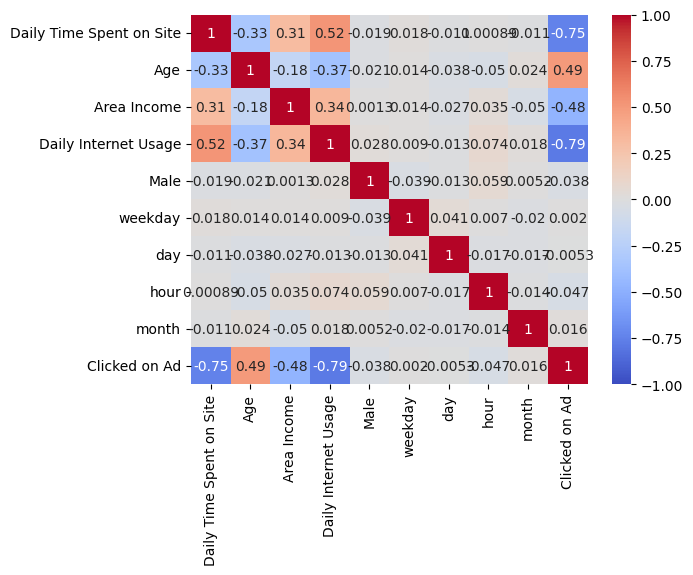

In [65]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', vmin=-1)

In [66]:
### De nada sirve lo de arriba :/
df_model = df_clean[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']]
df_model.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0


<Axes: >

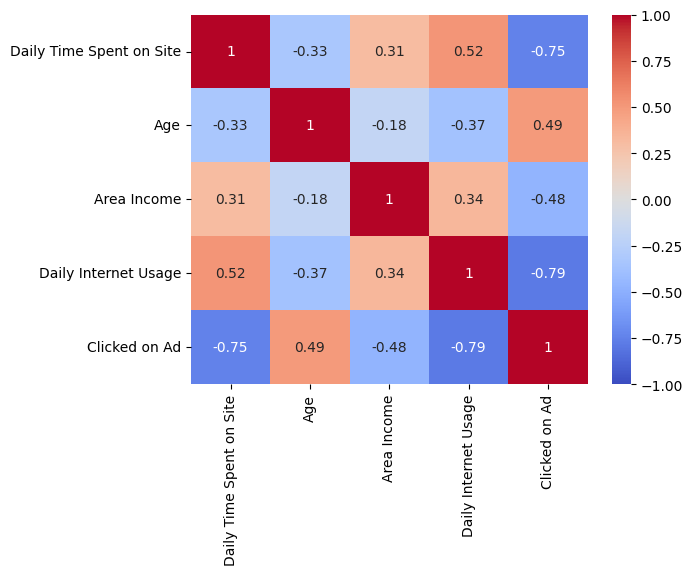

In [67]:
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', vmin=-1)


#### 2. Train test split


In [68]:
x1 = df_model.drop(['Clicked on Ad'], axis=1)
y1 = df_model['Clicked on Ad']

In [69]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=.3, random_state=42)
print("Total features shape:", df_model.shape)
print("Train features shape:", x1_train.shape)
print("Train target shape:", y1_train.shape)
print("Test features shape:", x1_test.shape)
print("Test target shape:", y1_test.shape)

Total features shape: (1000, 5)
Train features shape: (700, 4)
Train target shape: (700,)
Test features shape: (300, 4)
Test target shape: (300,)



#### 3. StandardScaler()


In [70]:
scaler = preprocessing.StandardScaler()
scaler.fit(x1_train)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [72]:
model = LogisticRegression(max_iter=1000)
model.fit(x1_train, y1_train)

LogisticRegression(max_iter=1000)

#### Cross validation

In [ ]:
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model, x1_train, y1_train, cv=kfold, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.9700000000000001 0.01525296893147331


# 4. Evaluation


#### 0. Accuracy

In [76]:
pred1 = model.predict(x1_test)
print(accuracy_score(y1_test, pred1))

0.9633333333333334


In [ ]:
### Normal el resultado - el accuracy medio del cross val era de 0.97


#### 1. Confusion Matrix


In [79]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[143,   3],
       [  8, 146]])


#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [87]:
pr = cm[1,1]/(cm[0,1]+cm[1,1])
pr

np.float64(0.9798657718120806)



#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [88]:
re = cm[1,1]/(cm[1,0]+cm[1,1])
re

np.float64(0.948051948051948)



#### 4. F1 Score


2 * p * r / (r + p)

In [89]:
2*pr*re/(pr+re)

np.float64(0.9636963696369636)



#### 5. ROC curve

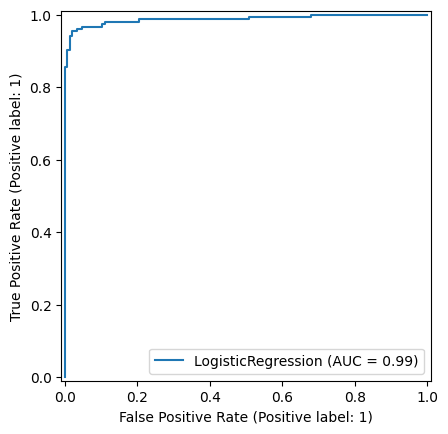

In [91]:
RocCurveDisplay.from_estimator(model, x1_test, y1_test)



#### 6. P-R curve

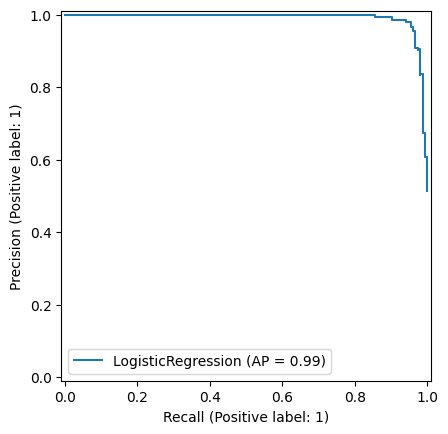

In [94]:
### Precisión vs recall curve
metrics.PrecisionRecallDisplay.from_estimator(model, x1_test, y1_test)